# 1. Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**fivethirtyeight**: 이 스타일은 미국의 정치 및 경제 뉴스 웹사이트인 FiveThirtyEight의 그래픽 스타일을 따르는 스타일입니다. 이 스타일은 깔끔하고 현대적인 디자인으로 알려져 있습니다. <br/>
<br/>

**%matplotlib inline**: 주피터 노트북이나 주피터랩에서 실행되는 경우, 그래프를 노트북 안에 인라인(inline)으로 표시하도록 설정하는 매직 커맨드입니다.

In [2]:
data = pd.read_csv(r'C:\Users\82104\OneDrive\바탕 화면\kaggle\Transcription\titanic\data\train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

나이, 선실 및 탑승지에는 널(null)값이 있습니다. 이를 수정해보겠습니다.

**How many Survived??**

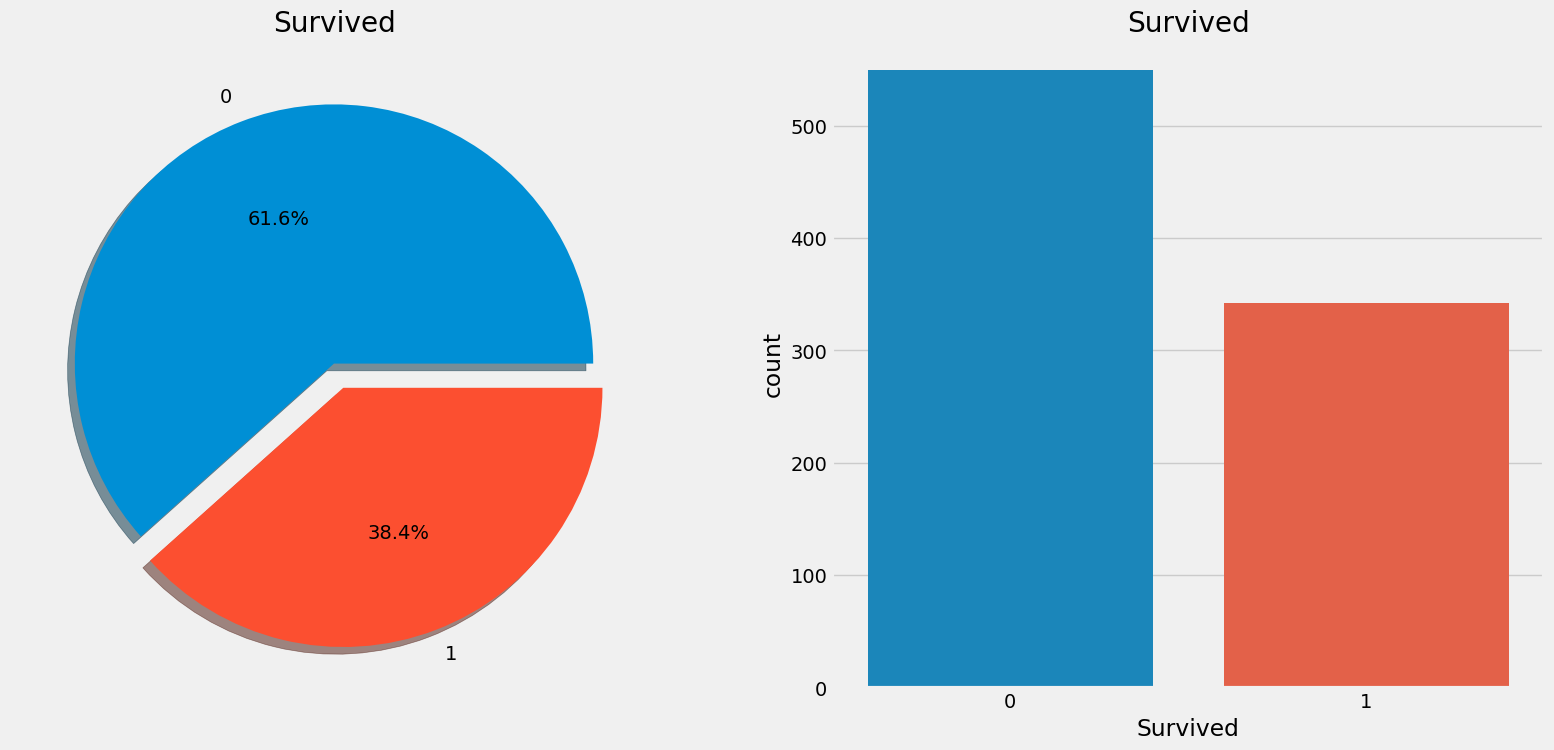

In [7]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode = [0, 0.1],
                                         autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

사고에서 많은 승객이 생존하지 못한 것으로 드러납니다. <br/>

훈련 세트에는 891명의 승객이 있었는데, 그 중 약 350명만이 생존했습니다. 즉, 전체 훈련 세트 중 생존율은 약 38.4%입니다. 데이터로부터 더 나은 통찰력을 얻기 위해 더 깊게 파고들어야 하며, 어떤 카테고리의 승객이 생존했고 그렇지 않았는지 알아봐야 합니다. <br/>

데이터셋의 다양한 특성을 사용하여 생존율을 확인해 보려고 합니다. 이 중 일부 특성은 성별, 탑승 항구, 나이 등입니다. <br/>

먼저, 데이터셋의 다양한 특성을 이해해 보겠습니다.

**Types Of Features** <br/>

범주형 특성: <br/>
범주형 변수는 두 개 이상의 범주를 가지며, 해당 특성의 각 값은 그 범주에 따라 분류될 수 있습니다. 예를 들어, 성별은 두 개의 범주(남성과 여성)를 가진 범주형 변수입니다. 이와 같은 변수에는 정렬이나 순서를 부여할 수 없습니다. 이런 변수를 명목 변수라고도 합니다. <br/>

데이터셋의 범주형 특성: 성별(Sex), 탑승지(Embarked) <br/>

순서형 특성: <br/>
순서형 변수는 범주 값과 유사하지만, 그 값 사이에 상대적인 순서나 정렬이 가능한 차이가 있습니다. 예를 들어, 높이라는 특성에 Tall, Medium, Short와 같은 값이 있다면 높이는 순서형 변수입니다. 이 경우 변수 내에서 상대적인 정렬을 할 수 있습니다. <br/>

데이터셋의 순서형 특성: 객실 등급(PClass) <br/>

연속적인 특성: <br/>
특성이 최소값이나 최대값 사이의 어떤 두 점 또는 특성 열에서 값을 가질 수 있는 경우 연속적이라고 합니다. <br/>

데이터셋의 연속적인 특성: 나이(Age)

# 2. Analysing The Features

**Sex -> Categorical Feature**

In [8]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

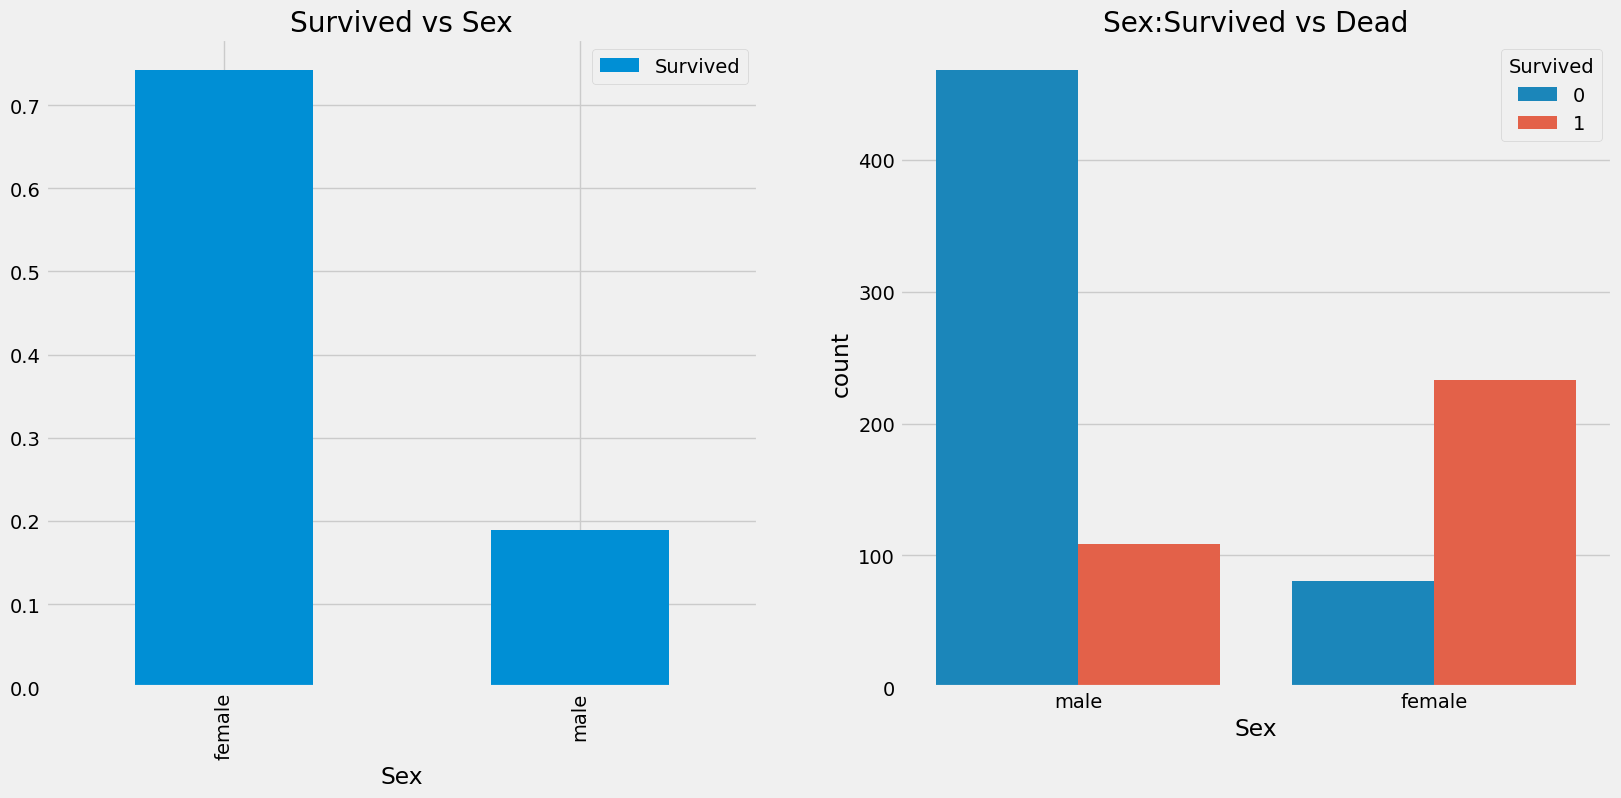

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

배에 탑승한 남성의 수는 여성의 수보다 훨씬 많습니다. 그럼에도 불구하고, 구조된 여성의 수는 남성의 거의 두 배입니다. 배에 탑승한 여성의 생존율은 약 75%이고, 남성의 생존율은 약 18~19%입니다. <br/>

이것은 모델링에 매우 중요한 특성으로 보입니다. 하지만 다른 특성도 확인해보겠습니다.

**Pclass -> Ordinal Feature

In [11]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


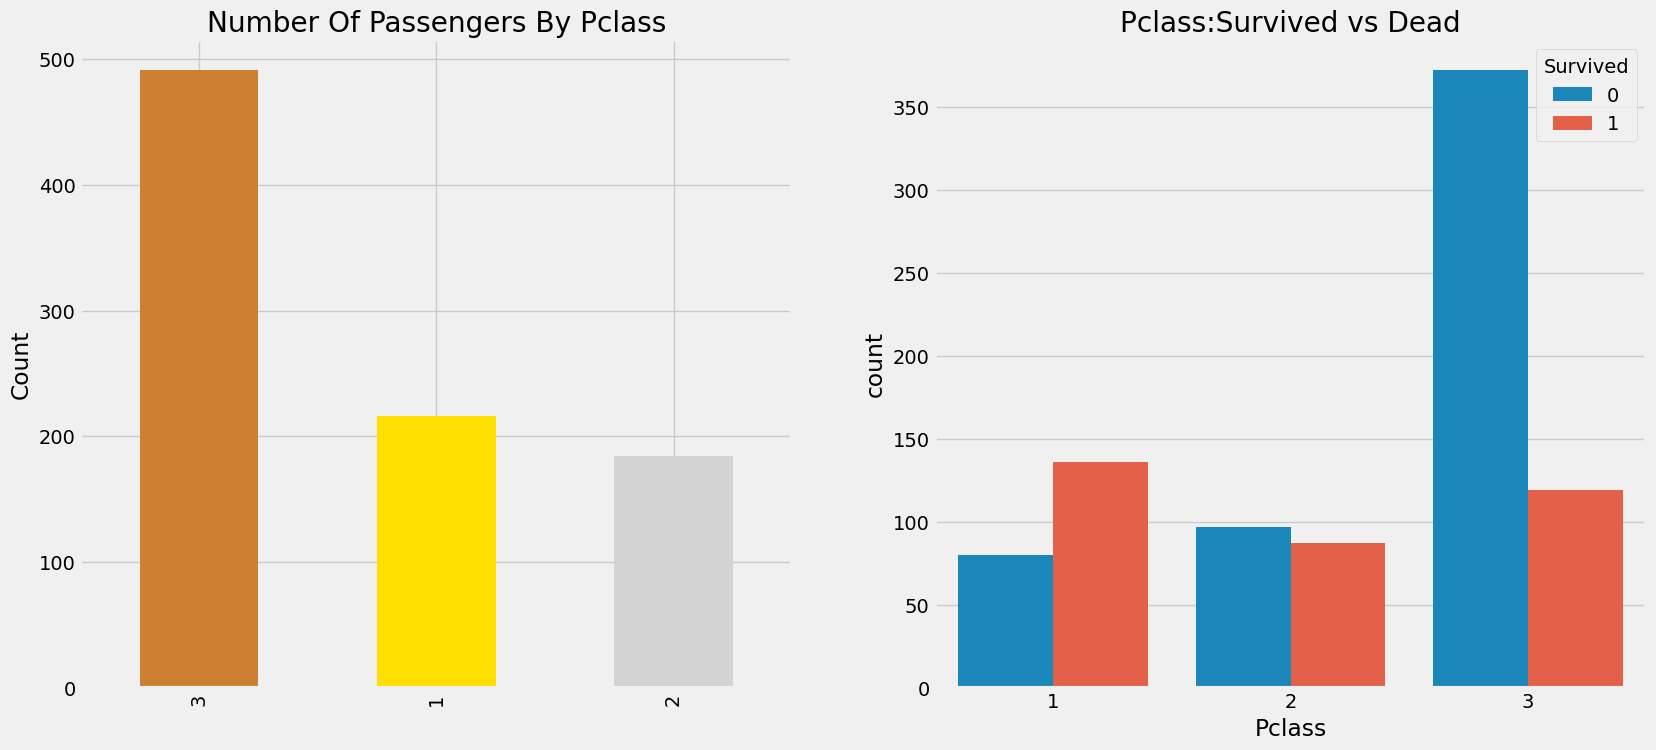

In [12]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

우리는 명백히 1등석(Pclass 1) 승객들이 구조 작업에서 매우 높은 우선순위를 받았다는 것을 알 수 있습니다. 3등석(Pclass 3) 승객의 수가 훨씬 더 많았음에도 불구하고, 그들의 생존율은 매우 낮았습니다. 약 25% 정도로 나타났습니다. <br/>

1등석의 생존율은 약 63%이고, 2등석은 약 48%입니다. 따라서 돈과 지위가 중요한 요소입니다. <br/>

이제는 성별과 좌석 등급(Pclass)을 함께 고려한 생존율을 확인해 보겠습니다.

In [13]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

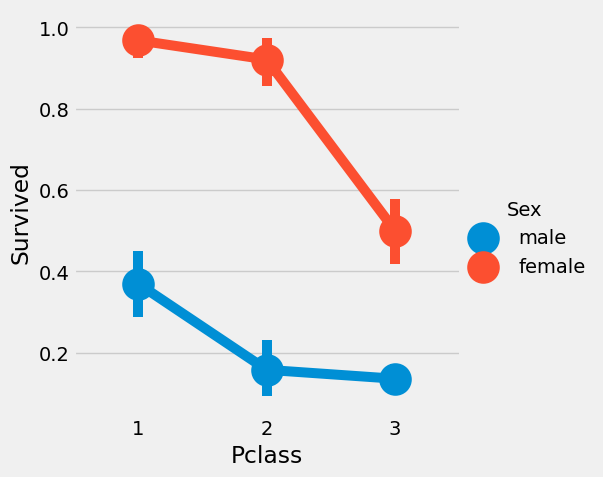

In [18]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data, kind = 'point')
plt.show()

CrossTab과 Catplot을 살펴보면, Pclass1의 여성 중 94명 중 3명만 사망하여 여성의 생존율이 약 95% - 96%라는 것을 쉽게 알 수 있습니다. <br/>

Pclass에 상관없이 여성이 구조 작업에서 우선순위를 받았다는 것은 분명합니다. 심지어 Pclass1의 남성들도 매우 낮은 생존율을 가지고 있습니다. <br/>

Pclass도 중요한 특성으로 보여집니다. 다른 특성을 분석해 보겠습니다.

**Age -> Countinous Feature**

In [19]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


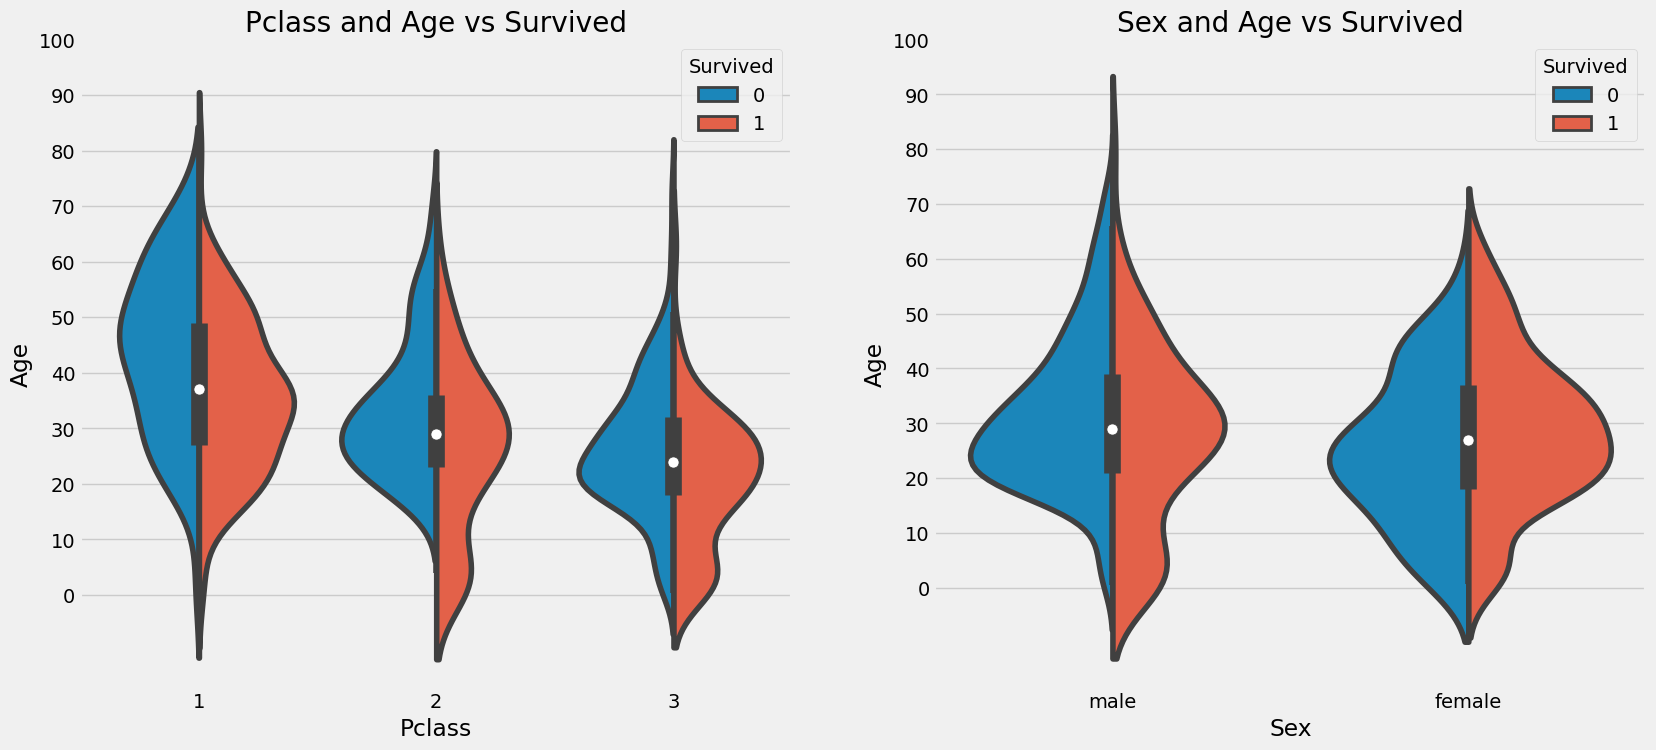

In [22]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot(x = "Pclass", y = "Age", hue = "Survived", data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x = "Sex", y = "Age", hue = "Survived", data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

관찰 결과: <br/>
1. 어린이의 경우 Pclass가 증가함에 따라 어린이의 수도 증가하며, Pclass에 관계없이 10세 미만(즉, 어린이)의 생존율이 좋아 보입니다.
2. 20-50세의 Pclass 1 승객의 생존 가능성이 높으며, 여성에게는 더욱 좋습니다.
3. 남성의 경우 나이가 증가함에 따라 생존 가능성이 감소합니다. <br/>

이전에 보았듯이, 나이 특성에는 177개의 Null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터셋의 평균 나이를 할당할 수 있습니다. 그러나 문제는 다양한 연령대의 사람들이 많이 있었습니다. 4세 어린이에게 29세인 평균 나이를 할당할 수는 없습니다. 승객이 어느 연령대에 속하는지 알아낼 방법이 있을까요? <br/>

이름 특성을 살펴보면 이름에는 Mr 또는 Mrs와 같은 호칭이 있습니다. 따라서 Mr 및 Mrs의 평균값을 해당 그룹에 할당할 수 있습니다.

In [24]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # lets extract the salutations

여기서는 정규식[A-Za-z]+)를 사용합니다. 이 정규식은 A-Z 또는 a-z 사이에 위치한 문자열을 찾고 마침표(.)가 뒤따르는 문자열을 찾습니다. 이렇게 함으로써 이름에서 이니셜을 성공적으로 추출할 수 있습니다.

In [25]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r') # Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle 또는 Mme와 같은 잘못된 이니셜이 있습니다. 이들을 Miss로 대체하겠습니다.

In [26]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace = True)

In [27]:
data.groupby('Initial')['Age'].mean() # lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**Filling NaN Ages**

In [28]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'), 'Age'] = 46

In [29]:
data.Age.isnull().any() # So no null values left finally

False

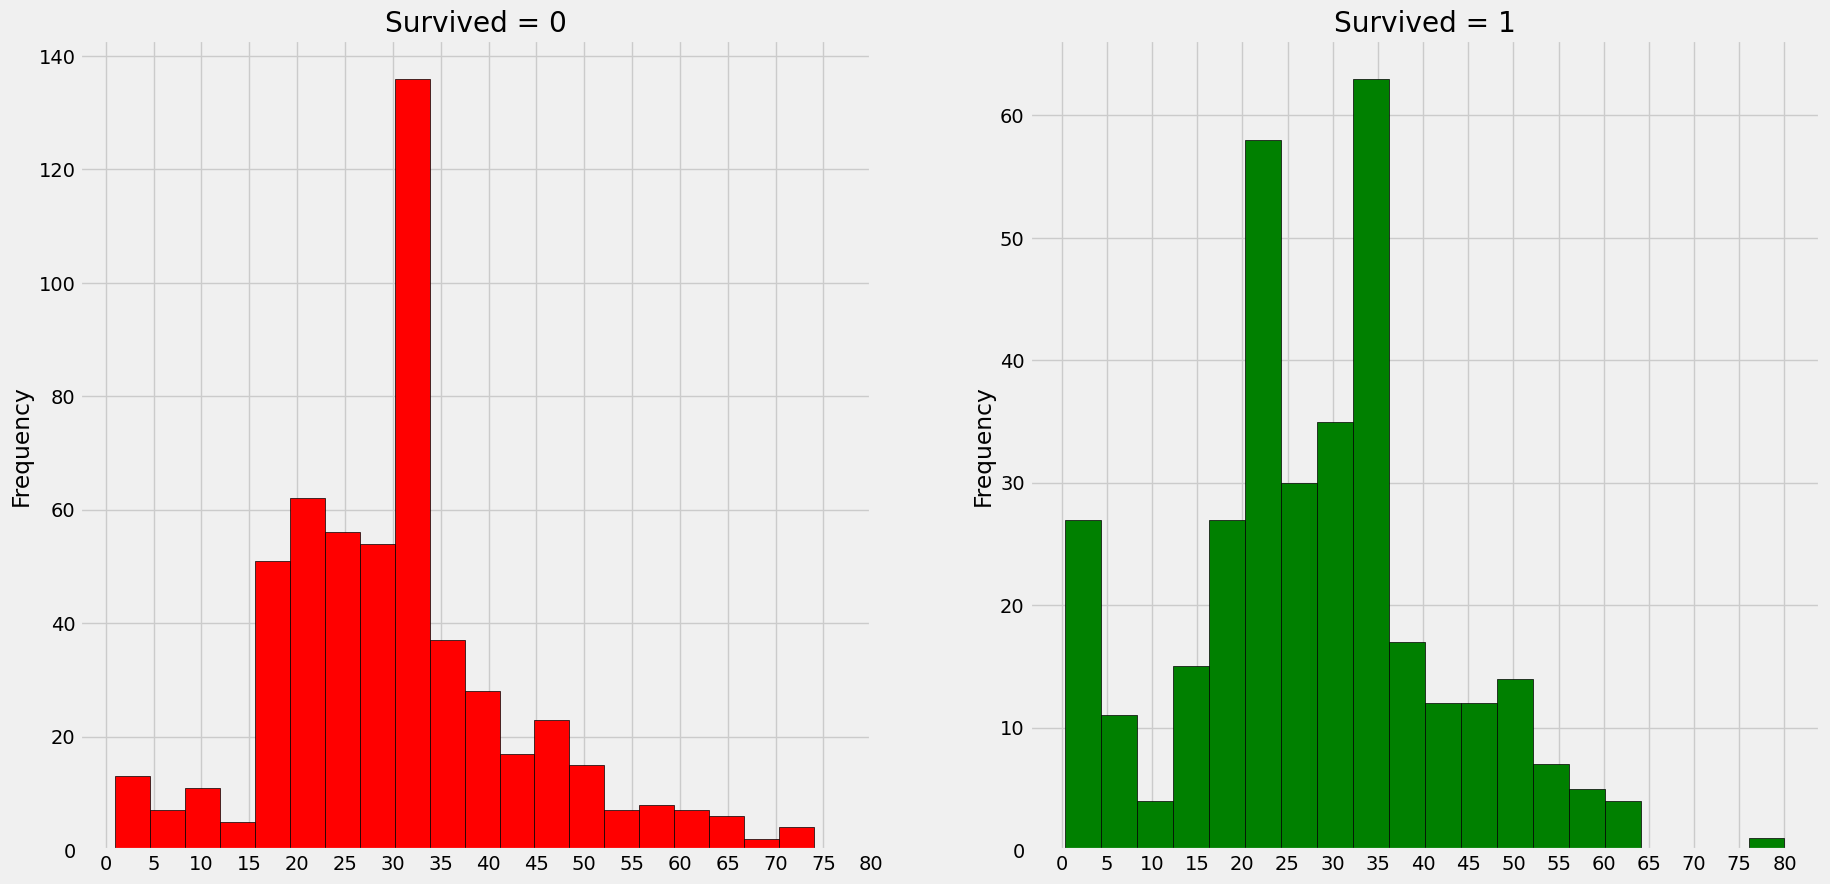

In [30]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

관찰 결과: <br/>
1. 5세 미만의 어린이들은 많은 수로 구조되었습니다.(여성과 아이를 먼저 구조하는 정책).
2. 가장 나이 많은 승객도 구조되었습니다(80세).
3. 가장 많은 사망자는 30-40세 연령 그룹에 속했습니다.

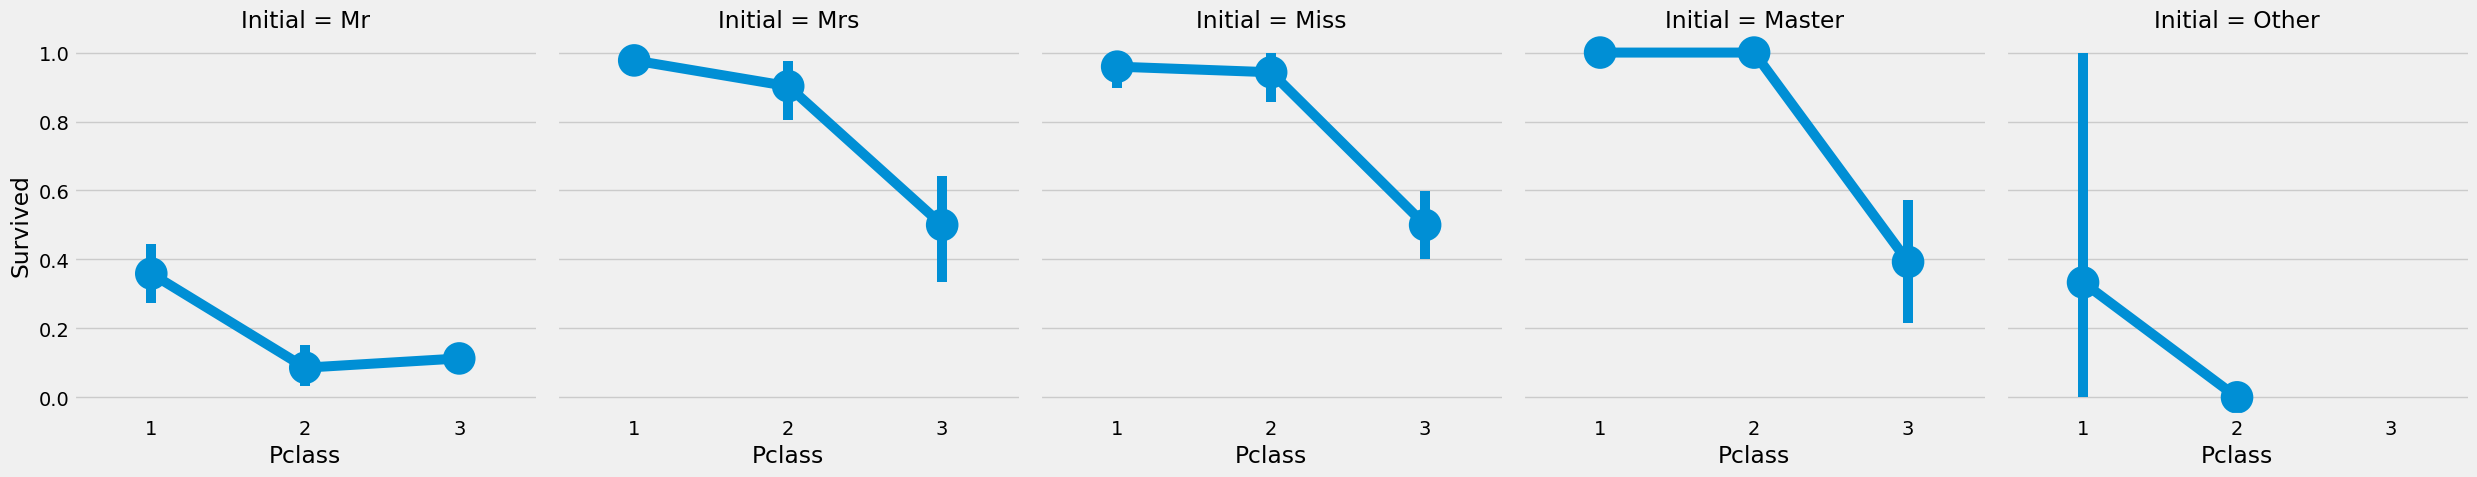

In [31]:
sns.catplot(x = 'Pclass', y = 'Survived', col = 'Initial', data = data, kind = 'point')
plt.show()

따라서 여성과 어린이를 먼저 구조하는 정책은 등급에 관계없이 유효합니다.

**Embarked -> Categorical Value**

In [32]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

**Chances for Survival by Port Of Embarkation**

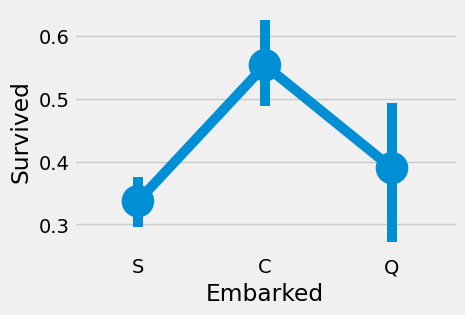

In [34]:
sns.catplot(x = 'Embarked', y = 'Survived', data = data, kind = 'point')
fig = plt.gcf() # 현재 활성화된 figure 객체 반환
fig.set_size_inches(5, 3)
plt.show()

C 항구의 생존 가능성은 0.55정도로 가장 높으며, S 항구에서 가장 낮습니다.

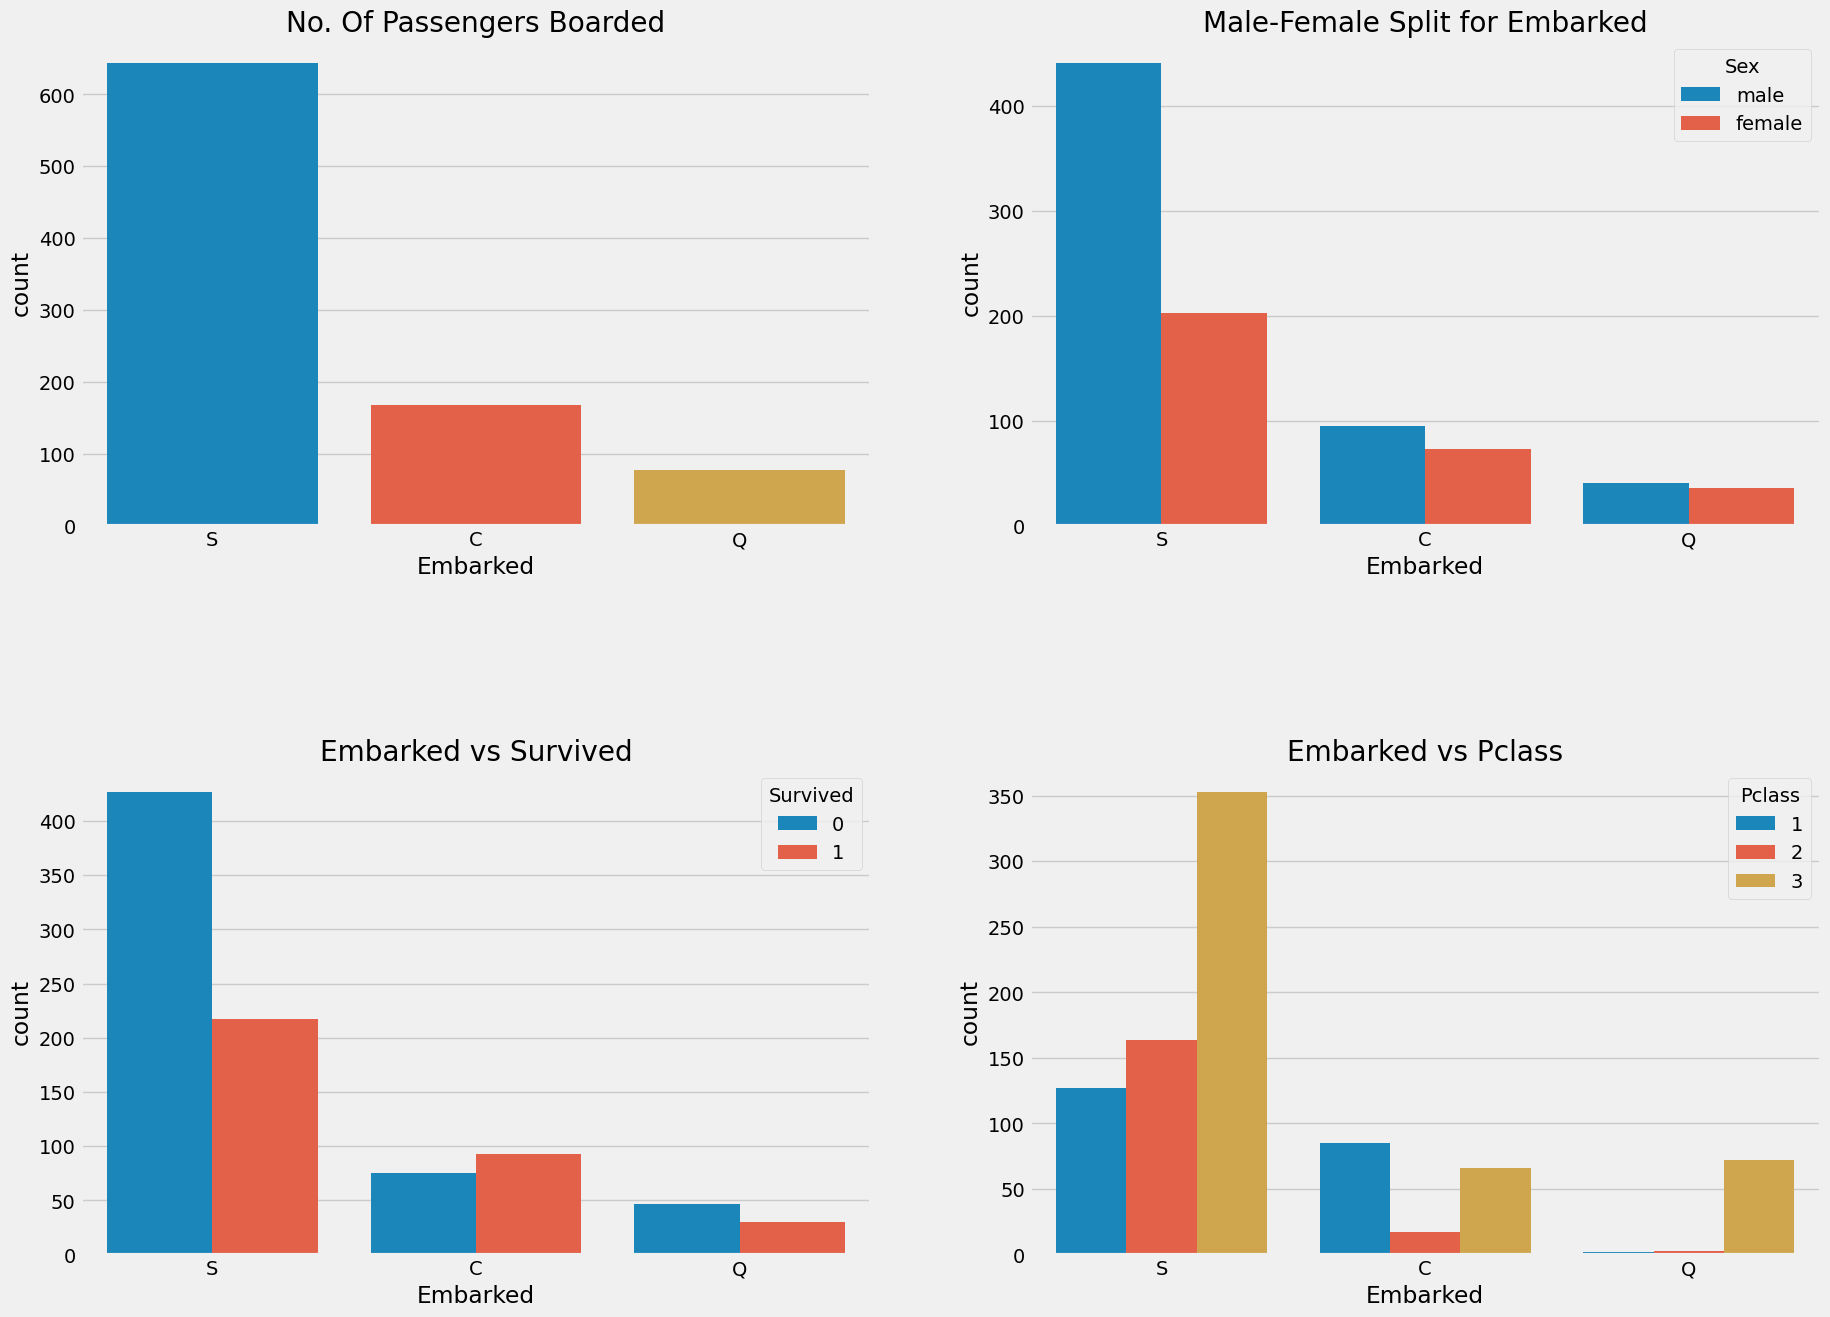

In [35]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot(x = 'Embarked', data = data, ax = ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot(x = 'Embarked', hue = 'Sex', data = data, ax = ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot(x = 'Embarked', hue = 'Survived', data = data, ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot(x = 'Embarked', hue = 'Pclass', data = data, ax = ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

관찰 결과: <br/>

1. 가장 많은 승객이 S에서 탑승했습니다. 그 중 대부분은 Pclass 3의 승객입니다.
2. C에서 탑승한 승객은 생존율이 상당히 높아 보입니다. 이는 Pclass 1 및 Pclass 2 승객이 모두 구조되었기 때문일 수 있습니다.
3. S 탑승지는 부유한 사람들이 주로 탑승한 항구로 보입니다. 그럼에도 불구하고 생존 가능성이 낮습니다. 이는 Pclass 3 승객의 약 81%가 생존하지 못했기 때문입니다.
4. Q 항구의 승객 중 거의 95%는 Pclass 3 승객이었습니다.

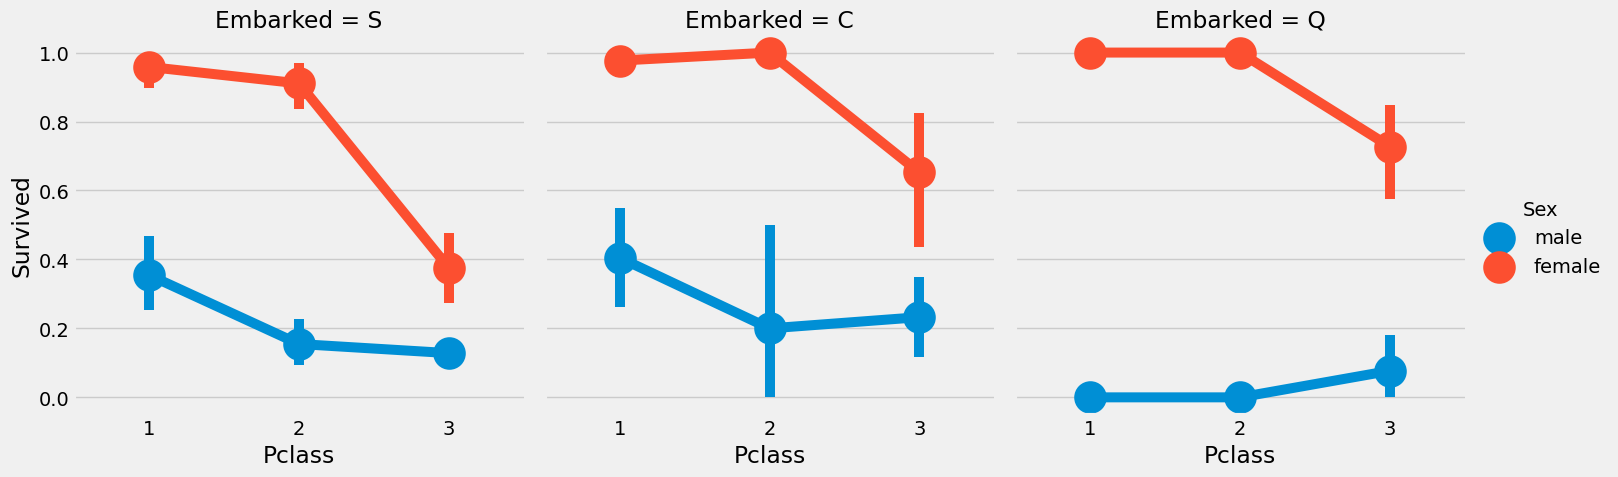

In [36]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked', data = data, kind = 'point')
plt.show()

관찰 결과: <br/>

1. Pclass 1과 Pclass 2의 여성의 경우, Pclass와 관계없이 생존 가능성이 거의 1입니다.
2. S 항구는 Pclass 3 승객에게 매우 불운한 항구로 보입니다. 남성과 여성의 생존율이 매우 낮습니다.
3. Q 항구는 대부분이 Pclass 3 승객으로 구성되어 있어 남성에게 가장 불운한 항구로 보입니다.

**Filling Embarked NaN** <br/>
S 항구에서 가장 많은 승객이 탑승한 것을 알았으므로 NaN 값을 S로 대체합니다.

In [37]:
data['Embarked'].fillna('S', inplace = True)

In [38]:
data.Embarked.isnull().any() # Finally No NaN values

False

**SibSip -> Discrete Feature** <br/>
이 기능은 개인이 혼자인지 아니면 가족 구성원과 함께 있는지를 나타냅니다. <br/>
Sibling = 형제, 자매, 이복형제, 이복자매 <br/>
Spouse = 남편, 아내

In [39]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


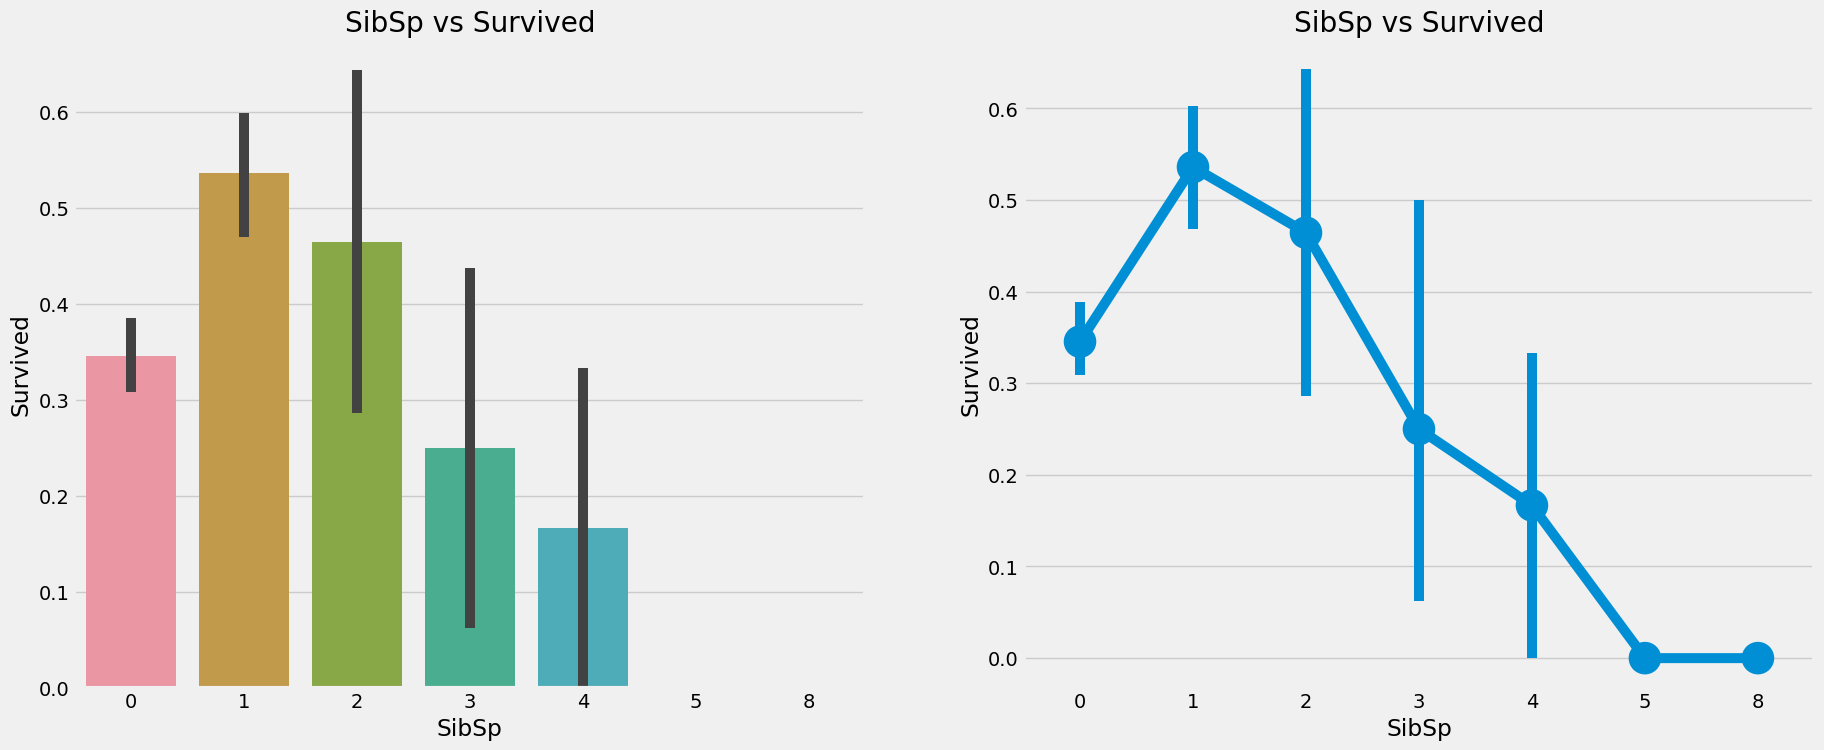

In [51]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot(x = 'SibSp', y = 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x = 'SibSp', y = 'Survived', data = data, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [52]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


관찰 결과: <br/>
막대 그래프와 팩터플롯은 혼자 탑승하고 형제자매가 없는 승객은 생존율이 약 34.5%인 것을 보여줍니다. 형제자매의 수가 증가할수록 생존율이 대략적으로 감소하는 것을 확인할 수 있습니다.

**Parch**

In [53]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


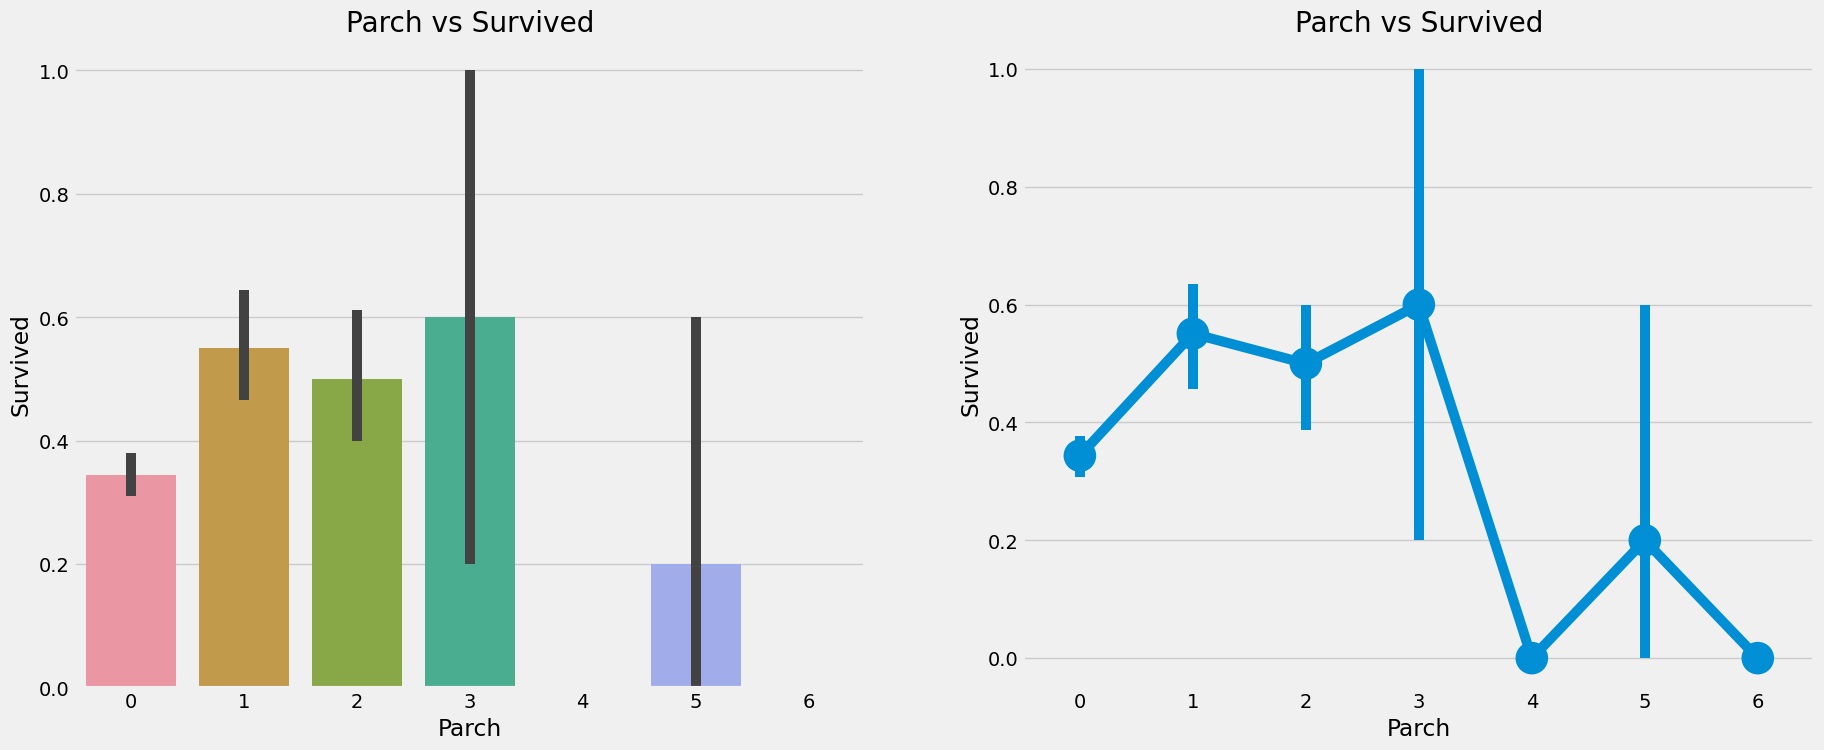

In [54]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot(x = 'Parch', y = 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x = 'Parch', y = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

관찰 결과: <br/>

여기에서도 결과는 매우 유사합니다. 부모화 함께 탑승한 승객은 생존할 가능성이 더 높습니다. 그러나 부모 수가 증가함에 따라 생존 가능성이 감소합니다. <br/>

1-3명의 부모를 가진 사람들은 생존 가능성이 높습니다. 혼자인 경우에도 생존 가능성이 감소하며, 4명 이상의 부모를 가진 사람들은 생존 가능성이 더욱 낮아집니다.

**Fare -> Continous Feature**

In [55]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


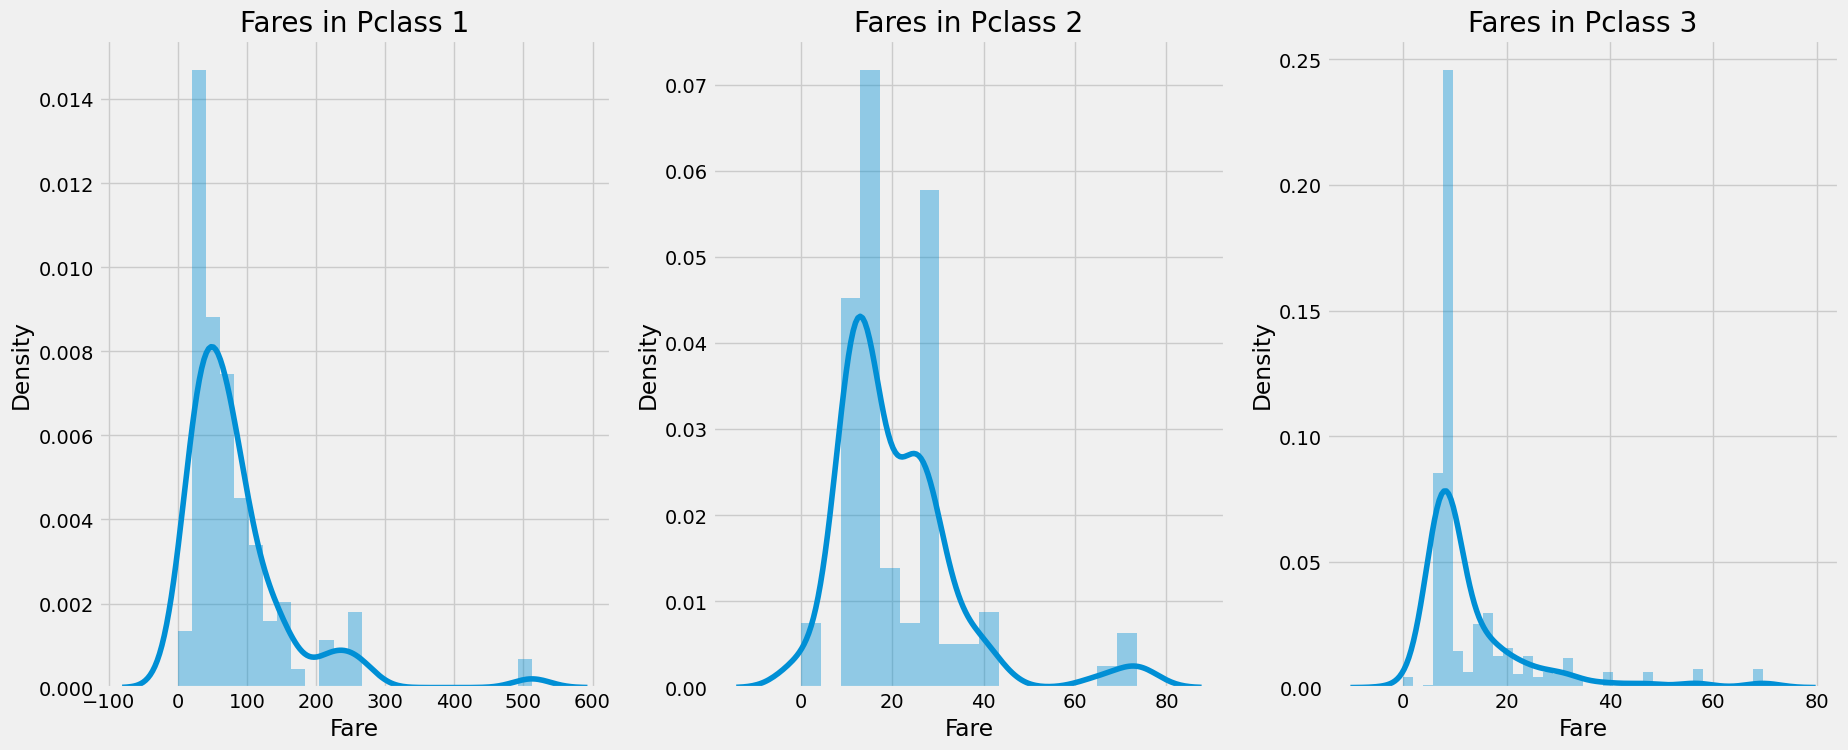

In [56]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass 1의 승객들의 요금은 분포가 크고, 이 분포는 등급이 낮아짐에 따라 감소합니다. 이것은 연속형 변수이므로 구간화를 통해 이산값으로 변환할 수 있습니다.

모든 특징에 대한 간략한 관찰 결과: <br/>
Sex: 여성의 생존 가능성이 남성보다 높습니다. <br/>

Pclass: 1등급 승객인 경우 생존 가능성이 높아집니다. Pclass3의 생존율은 매우 낮습니다. 여성의 경우 Pclass1에서의 생존 가능성은 거의 1이며, Pclass2에서도 높습니다. <br/>

Age: 5-10세 미만의 어린이들은 생존 가능성이 높습니다. 15세에서 35세 사이의 승객들은 많이 사망했습니다. <br/>

Embarked: C에서의 생존 가능성이 더 좋아 보입니다. 비록 대부분의 Pclass 1 승객들이 S에서 탑승했습니다. Q에서의 승객은 모두 Pclass 3 승객입니다. <br/>

Parch + SibSp: 형제자매, 배우자가 1-2명이 있는 경우 또는 부모가 1-3명인 경우 생존 가능성이 높아집니다. 혼자인 경우나 큰 가족과 함께 여행하는 경우보다 생존 가능성이 높습니다.

**Correlation Between The Features**

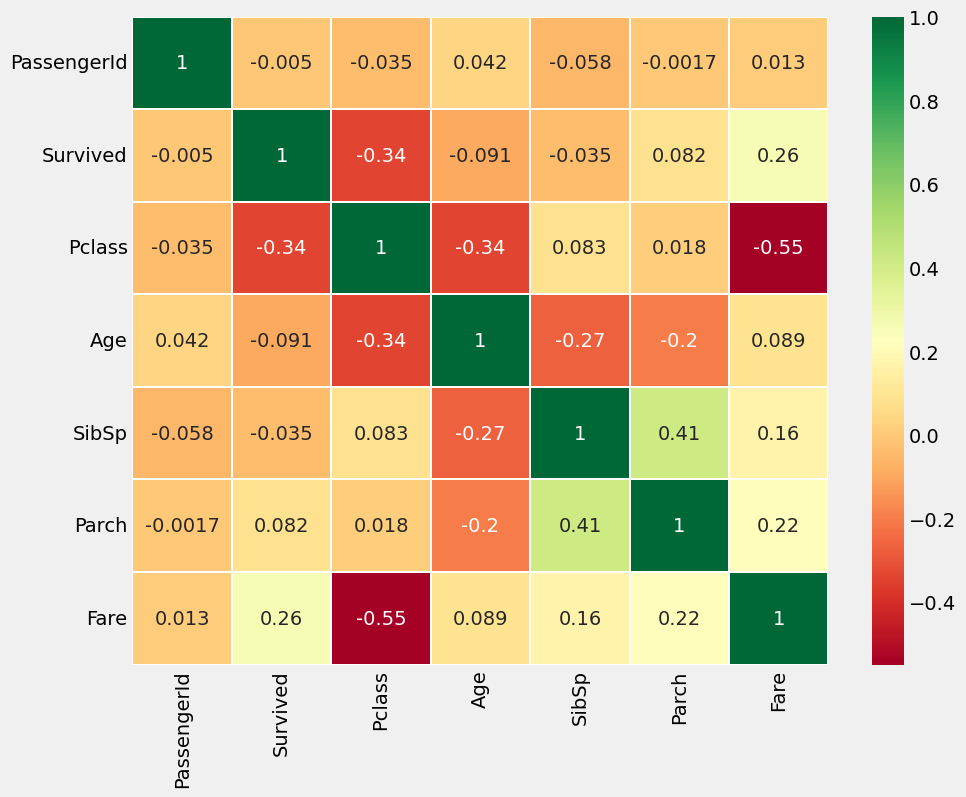

In [57]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2) # data.corr() --> correlation matrix
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

히트맵 해석하기 <br/>

먼저 알파벳이나 문자열 간에는 상관관계를 구할 수 없으므로, 히트맵에서는 숫자형 특성만 비교됩니다. 플롯을 이해하기 전에 상관관계가 정확히 무엇인지 알아봅시다. <br/>

양의 상관관계: 특성 A의 증가가 특성 B의 증가로 이어진다면, 두 특성은 양의 상관관계를 가지고 있습니다. 값 1은 완벽한 양의 상관관계를 의미합니다. <br/>

음의 상관관계: 특성 A의 증가가 특성 B의 감소로 이어진다면, 두 특성은 음의 상관관계를 가지고 있습니다. 값 -1은 완벽한 음의 상관관계를 의미합니다. <br/>

이제 두 특성이 높거나 완벽하게 상관관계가 있는 경우를 생각해봅시다. 하나의 특성이 증가하면 다른 특성도 증가한다는 것을 의미합니다. 이는 두 특성이 거의 동일한 정보를 포함하고 있으며 정보의 변동의 거의 없다는 것을 의미합니다. 이를 다중공선성이라고 하며, 두 특성 모두 거의 동일한 정보를 포함하고 있기 때문에 하나는 중복되는 특성입니다. <br/>

따라서 모델 생성 또는 학습할 때 중복된 특성을 제거하는 것이 좋습니다. 중복된 특성을 제거하면 학습 시간이 단축되고 다른 여러 이점이 있습니다. <br/>

위의 히트맵에서는 특성들이 서로 크게 상관관계가 없는 것을 볼 수 있습니다. 가장 높은 상관관계는 SibSp와 Parch 사이의 상관관계인 0.41입니다. 따라서 모든 특성을 사용할 수 있습니다.

# 3. 출처
1. <https://kaggle-kr.tistory.com/32>
2. <https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook>